# **Providing data-driven suggestions for HR**

This notebook analyzes a dataset and builds predictive models to provide valuable insights for the Human Resources (HR) department of a large consulting firm.

There are two key deliverables for this project:

- The complete code notebook, as provided here, detailing the entire analytical process as well as the interpretation and evaluation of the predictive models, relevant data visualizations, ethical considerations related to the analysis and its implications.
- A concise one-page summary intended for presentation to external stakeholders of the fictional company Sailfort Motors. 



## Project description

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. 

Due to high turnover, Salifort Motors seeks to improve employee retention and answer the following question: **What’s likely to make the employee leave the company?**

Sailfort's Human Ressource (HR) deprartment collected employee data. By analyzing the provided data and building a predictive model, this project aims at predicting employee turnover to enable the implementation of measures to increase retention and job satisfaction for current employees, and save money and time training new employees. 



# *PACE stages*

This project is guided by the PACE framework illustrated below. 

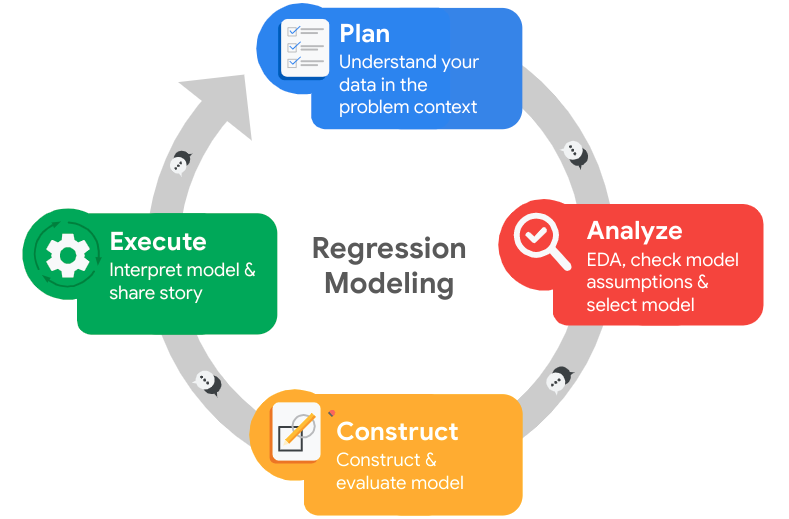

## **Pace: Plan**


### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They request a data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

### HR dataset

The dataset used in this roject contains 15,000 rows and 10 columns. The variables contained and this data set and a brief description is listed below. 

**Note:** The source of the data can be found on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [164]:
# Import packages 

# For data manipulation 
import pandas as pd
import numpy as np 

# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# For saving models
import pickle

### Load dataset



In [12]:
# Load dataset into a dataframe
df0 = pd.read_csv("sailfort_motors.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Initial data exploration and data cleaning

- Understanding the variables
- Cleaning the dataset (missing data, redundant data, outliers)



In [14]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [16]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [19]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [20]:
# Rename columns as needed
df0.rename(columns= {'average_montly_hours': 'average_monthly_hours', 
                    'time_spend_company' : 'tenure', 
                    'Work_accident' : 'work_accident', 
                    'Department' : 'department',
                    }, 
           inplace = True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [22]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
# Check for duplicates
df0.duplicated().sum()


3008

In [26]:
# Inspect some rows containing duplicates
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Since several variables are continuous acorss 10 columns, it seems unlikely that the duplicates represent legitimate observations. Therefore, duplicated values can be dropped. 

In [28]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

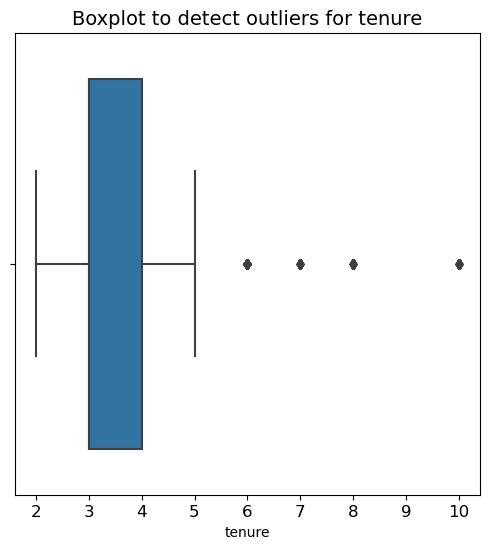

In [30]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure'])
plt.show()


In [31]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define upper limit and lower limit for non-outliers in `tenure` and print results
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower Lmit: ', lower_limit)
print('Upper Limit: ', upper_limit)
print()

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count number of rows containing outliers
print('Number of rows containing outliers in `tenure`: ', len(outliers))

Lower Lmit:  1.5
Upper Limit:  5.5

Number of rows containing outliers in `tenure`:  824


Certain types of models are more sensitive to outliers than others. Depending on which type of model is used, outliers may need to be removed at a later step. 

# pAce: Analyze Stage
Analyze relationships between variables



### Continue Data Exploration

We want to understand how many employees left and what percentage of all employees this figure represents.

In [35]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))


left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Out of 11991 employees, 1991 left. That is about 16.6% of all employees. 

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

C:\Users\Svenja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


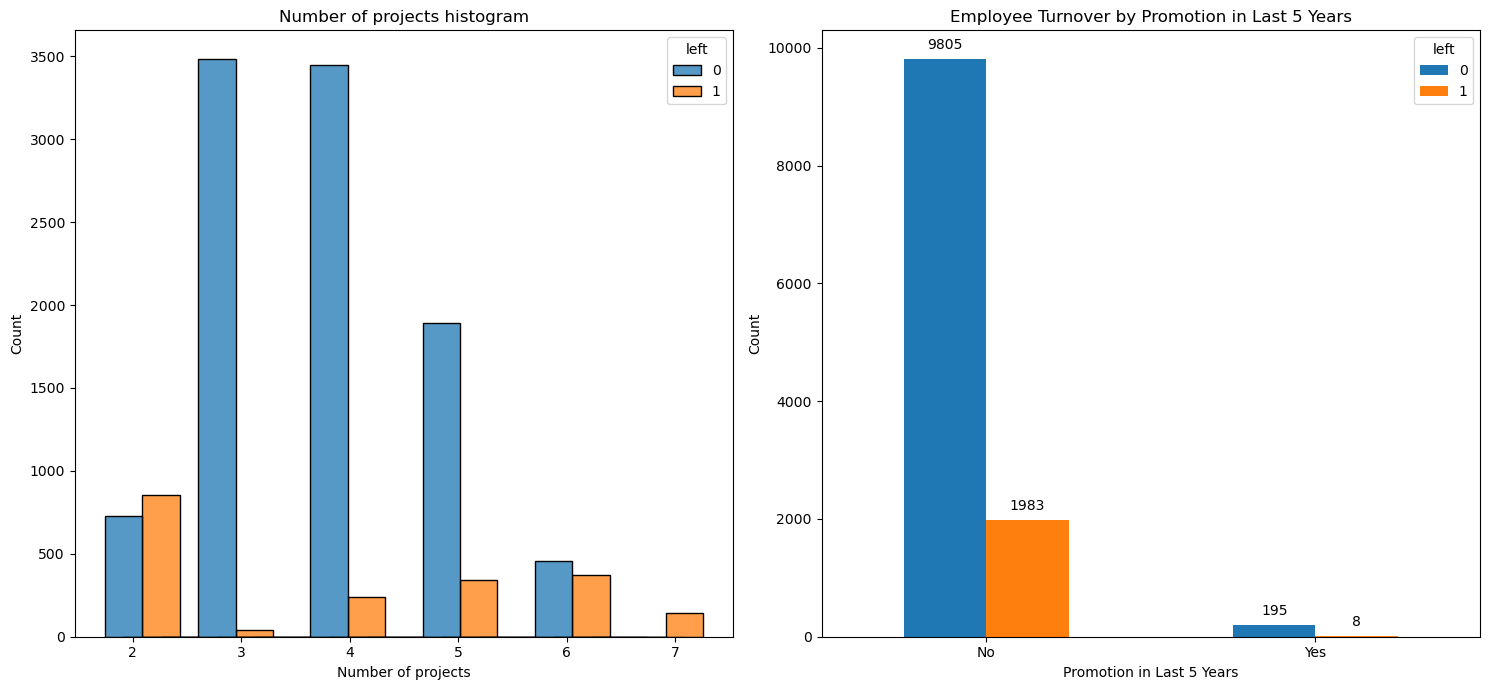

In [39]:
# Compare the proportion of employees who left/stayed across the varibales `number_project` and `promotion_last_5years`.

# Create a subplot matrix
fig, axes = plt.subplots(1,2, figsize=(15, 7))

# Histogram for 'Number of Projects'
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=4, ax=axes[0])
axes[0].set_title('Number of projects histogram', fontsize='12')
axes[0].set_xlabel('Number of projects')

# Count plot for 'Promotion Last 5 Years'

# Count the occurrences of 'Promotion Last 5 Years'
counts = df1.groupby(['promotion_last_5years', 'left']).size().unstack(fill_value=0)

# Create a bar plot
counts.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Employee Turnover by Promotion in Last 5 Years', fontsize='12')
axes[1].set_xlabel('Promotion in Last 5 Years')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

# Adding numbers on top of the bars
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        axes[1].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [40]:
# Calculate the percentage of employees who received a promotion in the last 5 year
df1['promotion_last_5years'].value_counts(normalize = True)

promotion_last_5years
0    0.983071
1    0.016929
Name: proportion, dtype: float64

In [41]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

#### Number of projects and turnover

The histogram visualizing the relationship between the **number of projects** and employee turnover suggests that the optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts. Any number of projects above or below that range is associated with higher turnover. All employees who were involved in 7 project to have left Sailfort Motors. 


It seems reasonable to assume that the number of projects employees are working on is related to the amount of hours they work. The variable `average_monthly_hours` should be considered as a potential influence on turnover. 


#### Promotions and employee turnover


Only 195 Sailfort Motors employees received a **promotion** in the last 5 year. That is about 1.69% of all employees. The barchart representing employee turnover by promotion in the last 5 years visualizes the rarity of a promotion while showing that out of the small number of employees who received a promotion in the last 5 years, the majority (195) stayed while only 8 employees left. At the same time, the majority of employees who did not receive a promotion in the last 5 years stayed. 


In the next step, we will take a closer look at `average_monthly_hours`.

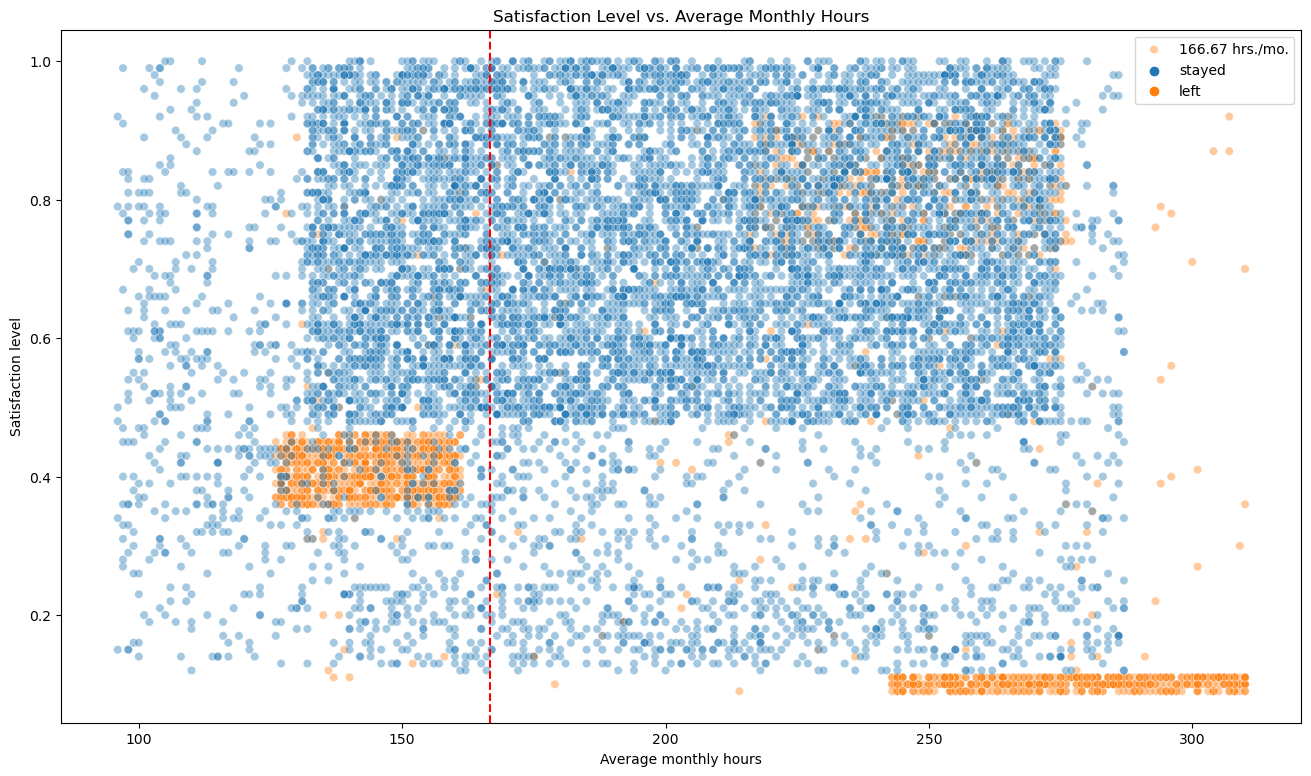

In [44]:
# Scatter plots

# Visualize the relationship between pairs of continuous variables 
# such as "Satisfaction Level" vs "Last Evaluation", "Average Monthly Hours" vs "Number of Projects", and observe if there are any patterns or correlations.

plt.figure(figsize=(16, 9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x=166.67, color='red', label='160 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Satisfaction Level vs. Average Monthly Hours', fontsize='12')
plt.xlabel('Average monthly hours')
plt.ylabel('Satisfaction level')

plt.show()

#### Satisfaction and average monthly hours
If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. One possible explanation could be that they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Overall, the shape of the distribution is rather strange and indicated data manipulation or synthetic data. 

In the next step, satisfaction is analyzed further with regard to `tenure`. 

C:\Users\Svenja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


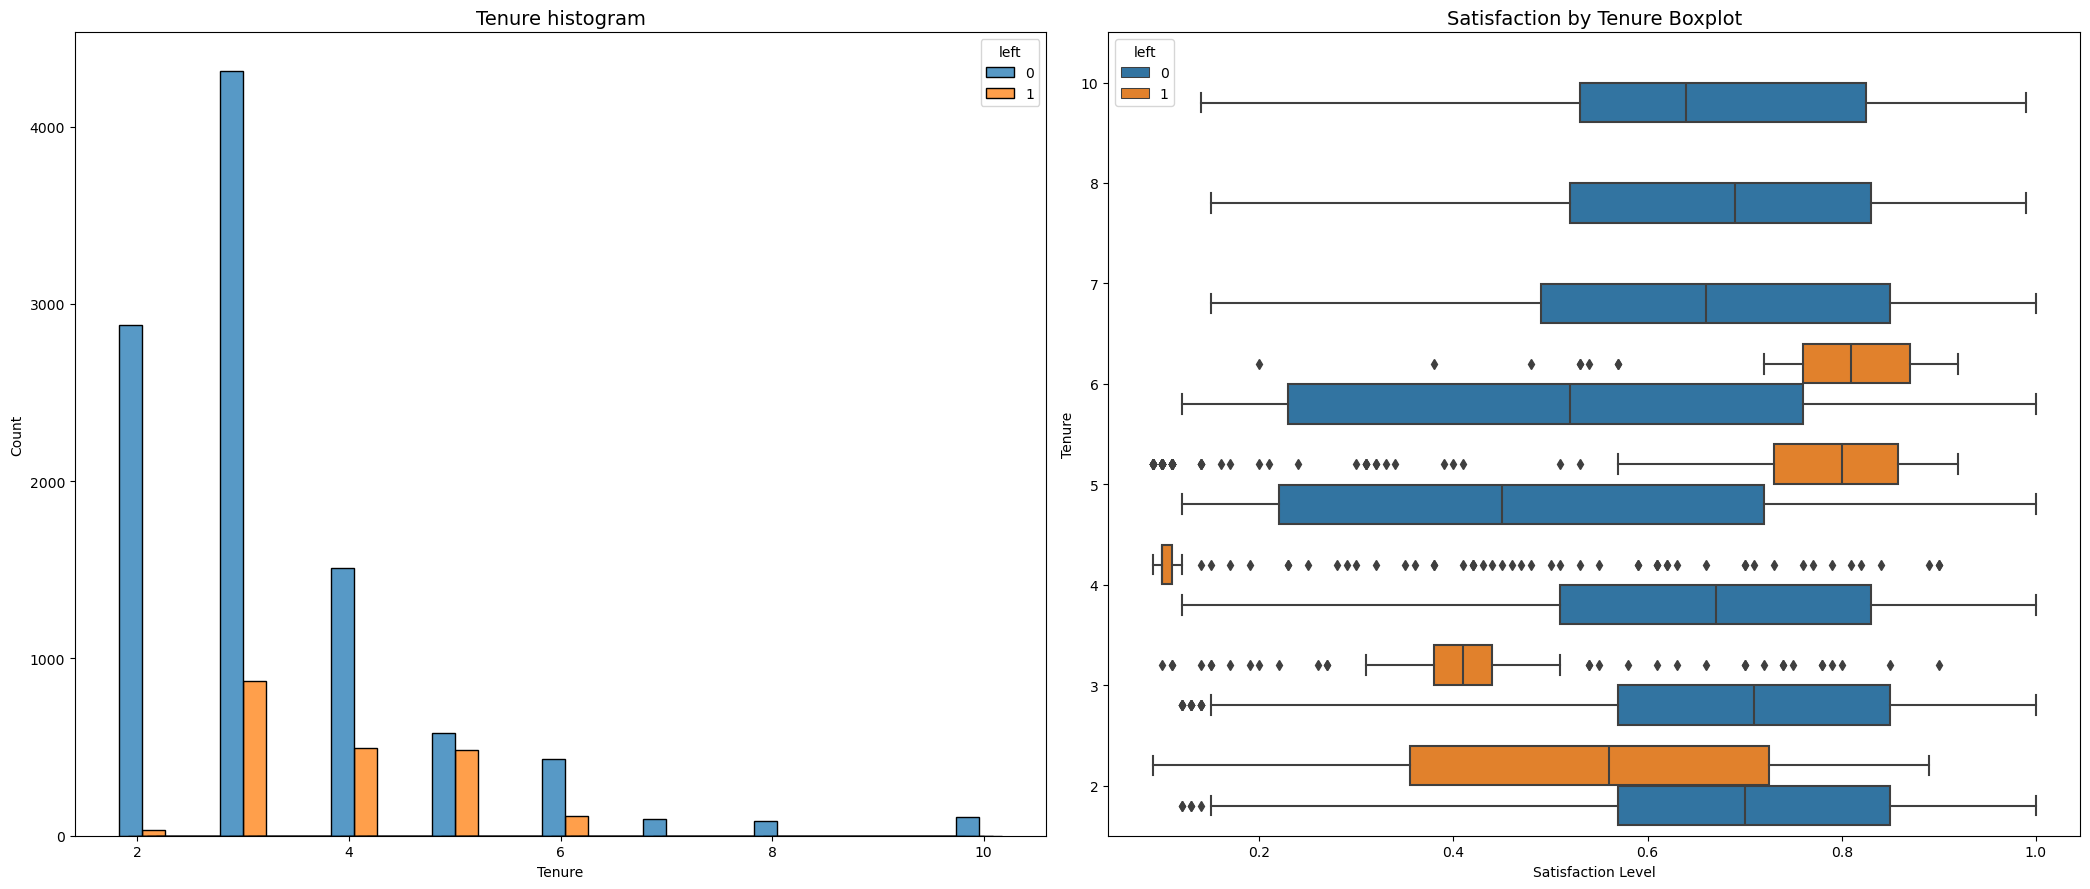

In [48]:
# Compare the proportion of employees who left/stayed across the varibales `tenure` and `satisfaction_level`.
# Create subplot matrix

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 9))

# Create histogram for `tenure` and `left`
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=axes[0])
axes[0].set_title('Tenure histogram', fontsize='14')
axes[0].set_xlabel('Tenure')

# Create line plot for `tenure` and `satisfaction_level`
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left',  orient="h", ax=axes[1])
axes[1].set_title('Satisfaction by Tenure Boxplot', fontsize='14')
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('Tenure')
axes[1].invert_yaxis()


plt.tight_layout()
plt.show()

In [49]:
# Calculate percentage of employees for tenure
tenure_count_perc = df1['tenure'].value_counts(normalize=True).sort_index()

print('Tenure count in percent by years:', tenure_count_perc)

Tenure count in percent by years: tenure
2     0.242682
3     0.432825
4     0.167209
5     0.088566
6     0.045201
7     0.007839
8     0.006755
10    0.008923
Name: proportion, dtype: float64


#### Satisfaction and Tenure
- The histogram shows that there are relatively few long-tenured employees. It is possible that they are higher-ranking and/or higher-paid employees. Most employees who left did so in the third year of working at Sailfort Motors. 
- The boxplot shows that two types of employees seem to leave the company: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures. 
- Four-year employees who left seem to have unusually low satisfaction levels. It would be worth investigating if a company policy change occured during that year.
- Longest-tenured employees didn't leave. Their satisfaction level is similar to new employees who stayed.

In the following step, turnover will by analyzed by `department`.

In [70]:
# Display counts for each department
df1["department"].value_counts(normalize=True)

department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64

C:\Users\Svenja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


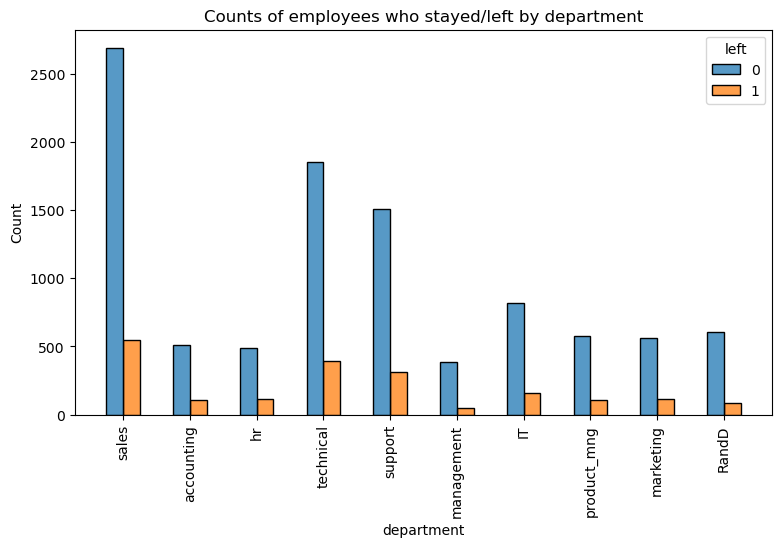

In [76]:
# Create a histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of employees who stayed/left by department', fontsize=12);

#### Department and turnover
There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 


C:\Users\Svenja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Svenja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


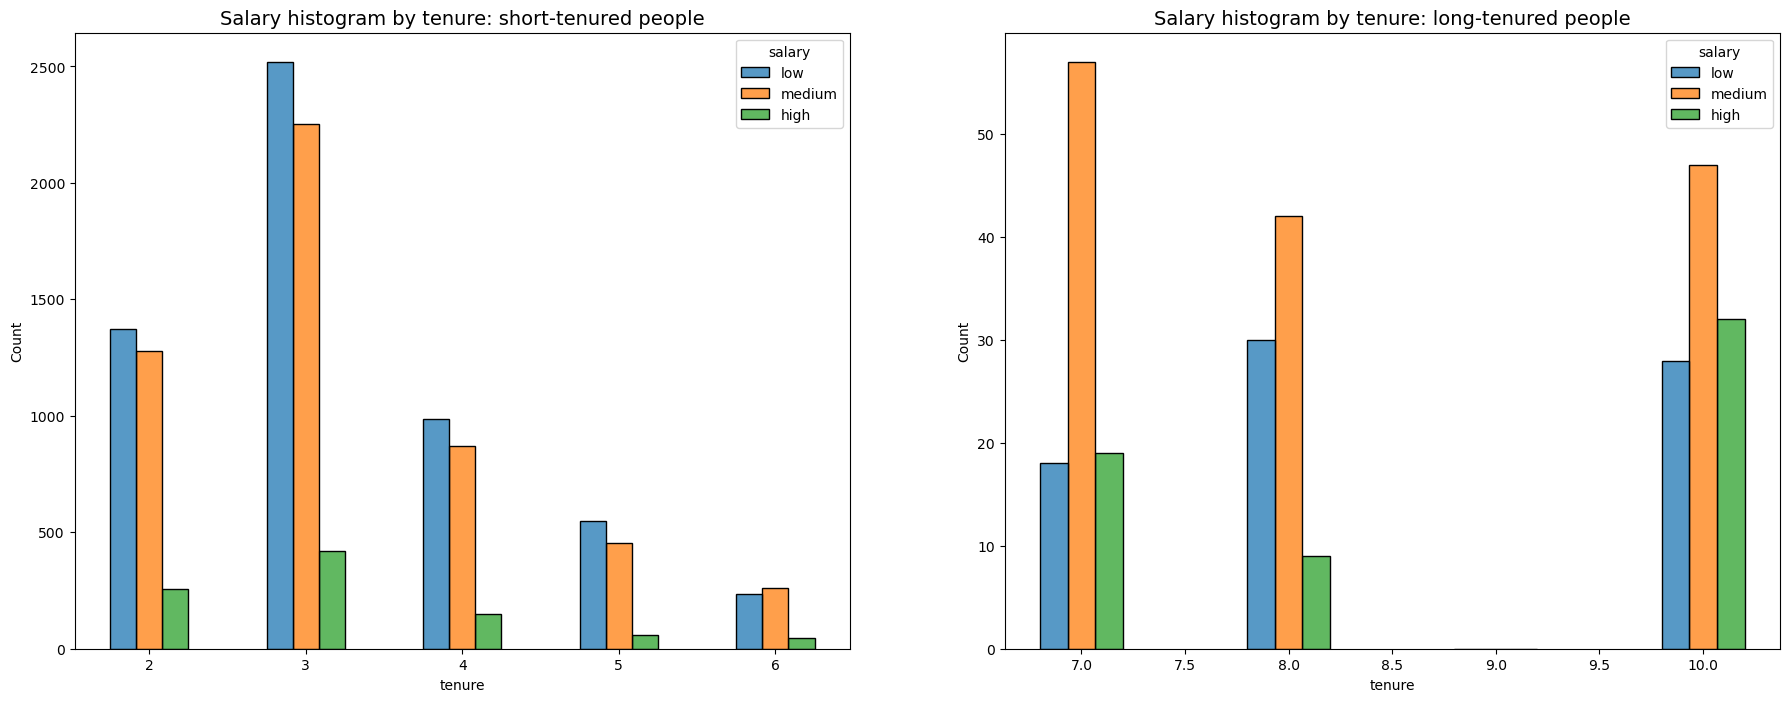

In [83]:
# Create a plot displaying salary by tenure
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

#### Salary and tenure
- The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.
- Medium salaries are most common among employees, regardless of their tenure.

### Insights
It seems that employees are leaving the company due to poor management. The 16.6% employee turnover rate seems to be linked to longer working hours, numerous projects, and generally lower satisfaction levels. Working long hours without receiving promotions can be demoralizing. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 


In the next stage of the PACE framework, we will develop a model to predict employee turnover.

# paCe: Construct Stage
#### Model Building, Results and Evaluation
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


#### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

#### Identify the types of models most appropriate for this task.

Since the variable `left` (whether an employee leaves the company) is categorical, either a Logistic Regression model, or a Tree-based Machine Learning model would be appropriate. In this project, a Logistis Regression model will be built to predict employee turnover. 

#### **Logistic Regression model** assumptions
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among variables
- No extreme outliers
- Linear relationship between each variable and the outcome variable


There is no reason to believe that the observations are not indepent from each other. Before building the regression model, we will test this and other assumptions to ensure their validity.

**Prepare data frame for modeling**

Before splitting the data into a test and train set, non-numeric variables need to be encoded. 

`department` is a categorical variable and will be dummy-encoded. 

`salary` is an ordinal categorical variable because there is a hierarchy to the categories. Therefore, the labels (low, medium, high) will be converted to numbers 0-2. 

In [92]:
# Copy the data frame
df_enc = df1.copy()

# Encode the non-numeric variables: `department` and `salary`
# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first = False)

# Display the new data frame
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


**Create Heatmap to identify correlated variables**

<Figure size 800x600 with 0 Axes>

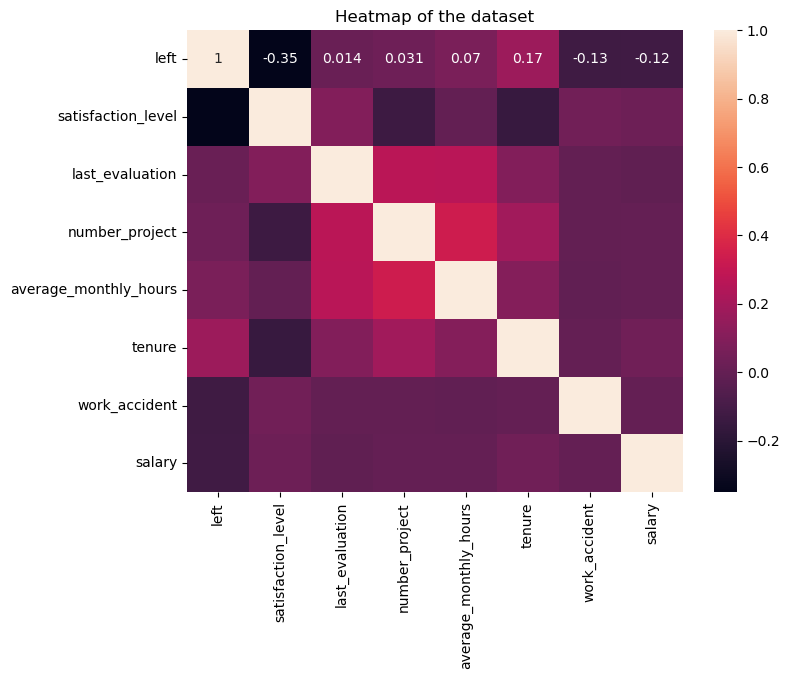

In [134]:
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['left','satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure','work_accident','salary']]
            .corr(), annot=True, cmap="rocket")
plt.title('Heatmap of the dataset')
plt.show()

### Insights

- Linear Relationship: Some predictor variables, particularly `satisfaction_level` (*r = -.35*),  show a linear relationship with the outcome variable "left", although the strength of these relationships varies, with most being weak to moderate.

- No Multicollinearity: The correlations between predictor variables do not suggest severe multicollinearity, as none of the correlations are above 0.7 or below -0.7.
 

Since logistis regression is relatively sensitive to outliers, the outliers identified in the `tenure` column earlier should be removed. 

#### Excluding outliers

In [112]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


### Building Logistic Regression Model

In [116]:
# Isolate the outcome variable and display first few rows
y = df_logreg['left']

# Display first few rows
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [118]:
# Select features to predict the outcome variable `left`
X = df_logreg.drop('left', axis=1)

# Display first few rows
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [120]:
# Split data into train and test data set
# Stratify based on `y` since the data set is unbalanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42) 

In [122]:
# Construct a logistic regression model and fit is to the training dataset
logreg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [124]:
# Use Logistic Regression model to get predictions on the test dataset
y_pred = logreg.predict(X_test)

#### Confusion Matrix
Visualize results of Logistig Regression Model

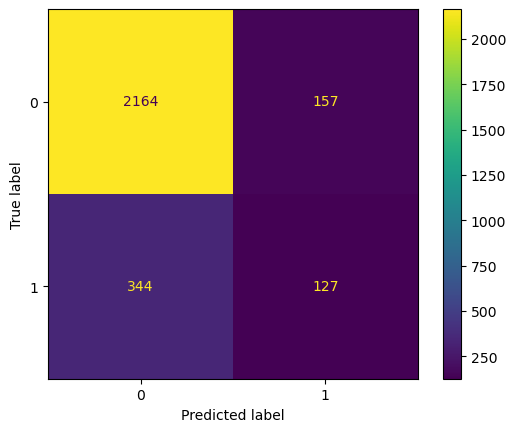

In [154]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=logreg.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

### Confusion Matrix Interpretation
The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

- True negatives: The number of people who did not leave that the model accurately predicted did not leave (2165).
- False positives: The number of people who did not leave the model inaccurately predicted as leaving (156).
- False negatives: The number of people who left that the model inaccurately predicted did not leave (348).
- True positives: The number of people who left the model accurately predicted as leaving (123).


A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

To further evaluate the performance of the model, class balanced should be checked and a classification report that includes precision, recall, f1-score, and accuracy metrics should be created. 

In [157]:
# Check for class balance
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split in the outcome variable `left`. This means that the data set is imbalanced, but not to a degree that required resampling. 

In [166]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']

print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved 
- a precision of 79%,
- recall of 82%,
- f1-score of 80% (all weighted averages), and
- accuracy of 82%.


However, if it's most important to predict employees who leave, then the scores are significantly lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



### Results and Evaluation

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.


### Conclusion, Recommendations, Next Steps

The logistic model confirms that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Consider promoting employees who have been with the company for four years, or conduct further investigation about why four-year tenured employees are so dissatisfied (potential policy changes). 
* Limit the number of projects that employees can work on.
* Reward employees for working longer hours but implement measures to prevent employees from working  excessively.
* Decide on a company overtime pay policy and communicate this policy clearly. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* Consider a proportionate scale for rewarding employees who put in more effort and reward more frequently.  

**Next Steps**

It would be helpful to collect more information on how frequently variables like `last_evaluation` or `satisfaction_level` were measured. If these measures are not performed frequently, they may not be very useful to predict employee retention. It's also possible that the evaluation score or satisfaction survey determines whether an employee leaves or stays, in which case it could be useful to try to predict performance score. 


Alternatively, a tree-based model could be implemented as it may achieve higher precision, recall and f1-scores. Building a K-means model on this data and analyzing the clusters could yield valuable insights as well. 